## Eigendecomposition
The eigendecomposition is one form of matrix decomposition. Decomposing a matrix means that we want to find a product of matrices that is equal to the initial matrix. In the case of eigendecomposition, we decompose the initial matrix into the product of its eigenvectors and eigenvalues. Before all, let’s see the link between matrices and linear transformation. Then, you’ll learn what are eigenvectors and eigenvalues.

### Matrices as linear transformations
You can think of matrices as linear transformations. Some matrices will rotate your space, others will rescale it. When we apply a matrix to a vector, we end up with a transformed version of the vector. When we say that we apply the matrix to the vector, it means that we calculate the dot product of the matrix with the vector. 

Now, let’s apply the matrix $[A]$ to this vector. We’ll plot the old vector $v$ (light blue) and the new one (orange):

(-1.0, 4.0)

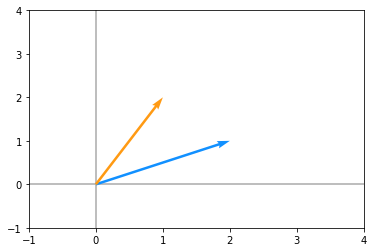

In [2]:
import numpy as np
from finmarkets import plotVectors
from matplotlib import pyplot as plt

A = np.array([[-1, 3], [2, -2]])
v = np.array([[2], [1]])

Av = A.dot(v)

plotVectors([v.flatten(), Av.flatten()], cols=['#1190FF', '#FF9A13'])
plt.ylim(-1, 4)
plt.xlim(-1, 4)

We can see that applying the matrix $[A]$ has the effect of modifying the vector.

### Eigenvectors and eigenvalues
%We have seen an example of a vector transformed by a matrix. Now imagine that the transformation of the initial %vector gives us a new vector that has the exact same direction. The scale can be different but the direction is the %same. Applying the matrix doesn’t change the direction of the vector. This special vector is called an eigenvector of %the matrix.

Imagine that the transformation of the initial vector by the matrix gives a new vector with the exact same direction. This vector is called an *eigenvector *of $[A]$.

This means that $v$ is a eigenvector of $[A]$ if $v$ and $[A]v$ (the transformed vector) are in the same direction. The output vector is just a scaled version of the input vector. This scalling factor is $\lambda$ which is called the *eigenvalue* of $[A]$.

Mathematically, we have the following equation:

$$[A]v=\lambda v$$

### Example 2.
Let’s $[A]$ be the following matrix:

$$A=\begin{bmatrix}
5 &1 \\
3 &3
\end{bmatrix}$$

We know that one eigenvector of A is:

$$v=\begin{bmatrix}
1 \\
1\end{bmatrix}$$
We can check that $[A]v=\lambda v$

$$\begin{bmatrix}
5 & 1 \\
3& 3\end{bmatrix}
\begin{bmatrix}
1 \\
1\end{bmatrix}
=\begin{bmatrix}
6 \\
6\end{bmatrix}$$

We can represent $v$ and $[A]v$ to check if their directions are the same:

(-1.0, 7.0)

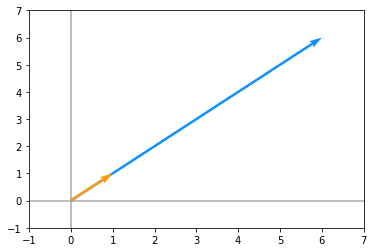

In [3]:
A = np.array([[5, 1], [3, 3]])
v = np.array([[1], [1]])

Av = A.dot(v)

orange = '#FF9A13'
blue = '#1190FF'

plotVectors([Av.flatten(), v.flatten()], cols=[blue, orange])
plt.ylim(-1, 7)
plt.xlim(-1, 7)

We can see that their directions are the same!

This example shows that the eigenvectors $v$ are vectors that change only in scale when we apply the matrix $[A]$ to them. 

### Find eigenvalues and eigenvectors in Python
$\tt{Numpy}$ provides a function returning eigenvectors and eigenvalues:
Here a demonstration with the preceding example.

In [4]:
A = np.array([[5, 1], [3, 3]])
np.linalg.eig(A)

(array([6., 2.]),
 array([[ 0.70710678, -0.31622777],
        [ 0.70710678,  0.9486833 ]]))

We can see that the eigenvalues are the same than the ones we used before: 6 and 2 (first array).

The eigenvectors correspond to the columns of the second array. This means that the eigenvector corresponding to $\lambda=6$ is:

$$\begin{bmatrix}
0.70710678 \\
0.70710678\end{bmatrix}$$

The eigenvector corresponding to $\lambda=2$ is:

$$\begin{bmatrix}
−0.31622777 \\
0.9486833\end{bmatrix}$$

The eigenvectors look different because they have not necessarly the same scaling than the ones we gave in the example. We can easily see that the first corresponds to a scaled version of our $[1 1]$. But the same property stands. We still have $[A]v=\lambda v$. 
So there are an infinite number of eigenvectors corresponding to the eigenvalue 6. They are equivalent because we are interested by their directions.

(-1.0, 3.0)

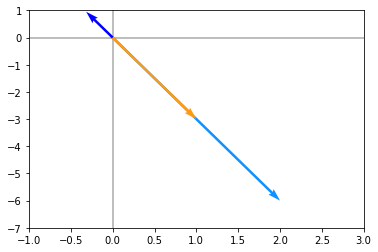

In [5]:
v = np.array([[1], [-3]])
Av = A.dot(v)
v_np = [-0.31622777, 0.9486833]

plotVectors([Av.flatten(), v.flatten(), v_np], cols=[blue, orange, 'blue'])
plt.ylim(-7, 1)
plt.xlim(-1, 3)

We can see that the vector found with $\tt{numpy}$ (in dark blue) is a scaled version of our preceding [1 −3].

### Concatenating eigenvalues and eigenvectors
Now that we have an idea of what eigenvectors and eigenvalues are, we can see how it can be used to decompose a matrix. All eigenvectors of a matrix $[A]$ can be concatenated in a matrix with each column corresponding to each eigenvector (like in the second array return by $\tt{np.linalg.eig(A))}$:

$$V=\begin{bmatrix}
1 & 1 \\
1 &−3\end{bmatrix}$$

The vector $\lambda$ can be created from all eigenvalues

$\lambda =\begin{bmatrix}
6\\
2\end{bmatrix}$$
Then the *eigendecomposition* is given by

$$[A]=[V]\cdot \textrm{diag}(\lambda)\cdot [V]^{−1}$$
where $\textrm{diag}(v)$ is a diagonal matrix containing all the eigenvalues. 
Continuing with our example we have

$$V=\begin{bmatrix}
1 & 1 \\
1 &−3\end{bmatrix}$$

$$\textrm{diag}(v)=\begin{bmatrix}
6&0\\
0&2\end{bmatrix}$$
The inverse matrix of $[V]$ can be calculated with $\tt{numpy}$

In [6]:
V = np.array([[1, 1], [1, -3]])
V_inv = np.linalg.inv(V)
V_inv

array([[ 0.75,  0.25],
       [ 0.25, -0.25]])

So let’s plug it into our equation:

$$ [V]\cdot\textrm{diag}(\lambda)\cdot [V]^{−1}=
\begin{bmatrix}
1 & 1 \\
1 &−3\end{bmatrix}
\begin{bmatrix}
6&0\\
0&2\end{bmatrix}
\begin{bmatrix}
0.75 & 0.25\\
0.25&-0.25 \end{bmatrix}
=\begin{bmatrix}
5 & 1\\
3& 3\end{bmatrix}
$$

Let’s check our result with Python:

In [7]:
lambdas = np.diag([6, 2])
V.dot(lambdas).dot(V_inv)

array([[5., 1.],
       [3., 3.]])

### Real symmetric matrix
In the case of real symmetric ($[A]=[A]^T$) matrices the eigendecomposition can be expressed as

$$[A]=[Q][\Lambda][Q]^T$$
where $[Q]$ is the matrix with eigenvectors as columns and $\Lambda$ is $\textrm{diag}(\lambda)$.

For that reason, it can useful to use symmetric matrices! Let’s do it now with $\tt{linalg}$ from $\tt{numpy}$

In [9]:
A = np.array([[6, 2], [2, 3]])
eigVals, eigVecs = np.linalg.eig(A)
eigVals = np.diag(eigVals)
eigVecs.dot(eigVals).dot(eigVecs.T)

array([[6., 2.],
       [2., 3.]])

### Quadratic form to matrix form
Let’s have the following quadratic equation:

$$f(x)=ax^2_1+(b+c)x_1x_2+dx^2_2$$
These quadratic forms can be generated by matrices:

$$f(x)=
\begin{bmatrix}
x_1 & x_2
\end{bmatrix}
\begin{bmatrix}
a&b\\
c&d
\end{bmatrix}
\begin{bmatrix}
x_1\\
x_2\end{bmatrix}
=x^T[A]x$$

### With the Principal Axes Theorem
Actually there is a simpler way to do the change of variable. We can stay in the matrix form. Recall that we start with the form:

$$f(x)=x^T[A]x$$
The linear substitution can be wrote in these terms. We want replace the variables $x$ by $y$ that relates by:

$$x=[P]y$$
We want to find $[P]$ such as our new equation doesn’t contain the cross terms. The first step is to replace that in the first equation:

$$x^T[A]x=([P]y)^T[A]([P]y)=y^T([P]^T[A][P])y$$
Can you see the how to transform the left hand side ($x$) into the right hand side ($y$)? The substitution is done by replacing $[A]$ with $[P]^T[A][P]$. We also know that $[A]$ is symmetric and thus that there is a diagonal matrix $[D]$ containing the eigenvectors of $[A]$ and such as $[D]=[P]^T[A][P]$. We thus end up with:

$$x^T[A]x=y^T[D]y$$
All of this implies that we can use $[D]$ to simplify our quadratic equation and remove the cross terms. If you remember from example 2 we know that the eigenvalues of $[A]$ are:

$$[D]=\begin{bmatrix}
7 &0\\
0 &2\end{bmatrix}$$

$$x^T[A]x=y^T[D]y=y^T
\begin{bmatrix}
7 &0\\
0 &2\end{bmatrix}y=
\begin{bmatrix}y_1 & y_2\end{bmatrix}
\begin{bmatrix}
7 &0\\
0 &2\end{bmatrix}
\begin{bmatrix}y_1\\y_2\end{bmatrix}
=\begin{bmatrix}7y_1+0y_2 & 0y_1+2y_2\end{bmatrix}
\begin{bmatrix}y_1\\y_2\end{bmatrix}=7y^2_1+2y^2_2
$$

This form (without cross-term) is called the principal axes form.

### Quadratic form optimization
Depending to the context, optimizing a function means finding its maximum or its minimum. It is for instance widely used to minimize the error of cost functions in machine learning.

Here we will see how eigendecomposition can be used to optimize quadratic functions and why this can be done easily without cross terms. The difficulty is that we want a constrained optimization, that is to find the minimum or the maximum of the function for $f(x)$ being a unit vector.

#### Example 8.
We want to optimize:

$f(x)=x^T[A]x$ subject to $||x||_2=1$.In our last example we ended up with:

$f(x)=7y^2_1+2y^2_2$
And the constraint of $x$ being a unit vector imply:

$$||x||_2=1 \implies x^2_1+x^2_2=1$$
We can also show that $y$ has to be a unit vector if it is the case for $x$. Recall first that $x=[P]y$:

$$||x||_2=$x^Tx=([P]y)^T([P]y)=y^T[P]^T[P]y=y^Ty=||y||_2$$
So $‖x‖_2=‖y‖_2=1$ and thus $y^2_1+y^2_2=1$
Since $y^2_1$ and $y^2_2$ cannot be negative because they are squared values, we can be sure that $2y^2_2\leq 7y^2_2$. Hence:

$$f(x)=7y^2_1+2y^2_2\leq 7y^2_1+7y^2_2 \leq 7(y^2_1+y^2_2)\leq7$$
This means that the maximum value of $f(x)$ is 7.

The same way can lead to find the minimum of $f(x)$. $7y^2_1\geq 2y^2_1$ and:

$$f(x)=7y^2_1+2y^2_2\geq2y^2_1+2y^2_2\geq2(y^2_1+y^2_2)\geq2$$
And the minimum of $f(x)$ is 2.

## The Moore-Penrose Pseudoinverse
The Moore-Penrose pseudoinverse is a direct application of the SVD. 
But before all, we have to remind that systems of equations can be expressed under the matrix form.

The inverse of a matrix $[A]$ can be used to solve the equation $[A]x=b$:

$$
\begin{gathered}[A]^{−1}[A]x=[A]^{−1}b 
[I]x=[A]^{−1}b
x=[A]^{−1}b
\end{gathered}
$$
But in the case where the set of equations have 0 or many solutions the inverse cannot be found and the equation cannot be solved. The pseudoinverse is $[A]^+$ such as:

$$[A][A]^+≈[I]$$

Think of it as a generalization of the inverse. It is defined in for all matrices, but has fewer guaranteed properties as a result. For example, it will be a matrix such that  $[𝐴][𝐴]^+[𝐴]=[𝐴]$ , but not necessarily the stronger usual inverse property  $[𝐴]^{−1}[𝐴]=[𝐴][𝐴]^{−1}=[𝐼]$  (the second one implies the first). In the special case where a matrix has an inverse, it will be the same as the pseudo-inverse. 

%So pinv() gives you the inverse where it exists, and still gives something inverse-like everywhere else.

The pseudo-inverse is the "closest" answer to  $[𝐴][𝑋]=[𝐼]$, in the sense that the norm $||[𝐴][𝑋]−[𝐼]||_2$  is smallest. It's 0 when the inverse exists of course.

To me the important property of the pseudo-inverse arises in solving a simple linear system of equations. It has 0, 1, or infinitely many solutions.  $𝑥=[𝐴]^+𝑏$  is the closest solution when none exists in the sense above. It gives the single answer when 1 exists. And when many exists, it is the smallest solution in the sense that  $||𝑥||_2$  is smallest.

Example 1.
Let’s see how to implement that. We will create a non square matrix A, calculate its singular value decomposition and its pseudoinverse.

$$A=\begin{bmatrix}
7&2\\
3&4\\
5&3\end{bmatrix}$$

In [23]:
A = np.array([[7, 2], [3, 4], [5, 3]])
A_plus = np.linalg.pinv(A)
print (A_plus)

[[ 0.16666667 -0.10606061  0.03030303]
 [-0.16666667  0.28787879  0.06060606]]


It looks good! We can now check that it is really the near inverse of A. Since we know that

$$[A]^{−1}[A]=[I]$$

In [24]:
A_plus.dot(A)

array([[1.00000000e+00, 2.35922393e-16],
       [3.33066907e-16, 1.00000000e+00]])

This is not bad! This is almost the identity matrix!

A difference with the real inverse is that $[A]^+[A]≈[I]$ but $[A][A]^+\neq [I]$.

### Using the pseudoinverse to solve a overdetermined system of linear equations
In general there is no solution to overdetermined systems. 

The pseudoinverse solve the system in the least square error perspective: it finds the solution that minimize the error. We will see this more explicitly with an example.

For this example we will consider this set of three equations with two unknowns:

$$
\begin{cases}
−2x_1−x_2=−2 \\
4x_1−x_2=−8 \\
−x_1−x_2=−2 
\end{cases}$$

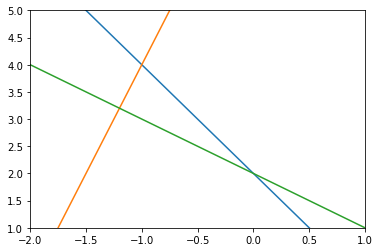

In [13]:
x1 = np.linspace(-5, 5, 1000)
x2_1 = -2*x1 + 2
x2_2 = 4*x1 + 8
x2_3 = -1*x1 + 2

plt.plot(x1, x2_1)
plt.plot(x1, x2_2)
plt.plot(x1, x2_3)
plt.xlim(-2., 1)
plt.ylim(1, 5)
plt.show()

Putting this into the matrix form we have:


$$[A]=\begin{bmatrix}
−2&-1\\
4&-1\\
−1&−1\end{bmatrix}$$

$$x=\begin{bmatrix}
x_1\\
x_2\end{bmatrix}$$

and

$$b=\begin{bmatrix}
−2\\
−8\\
−2\end{bmatrix}$$

So we have:

$$[A]x=b\implies 
\begin{bmatrix}
−2&-1\\
4&-1\\
−1&−1\end{bmatrix}
\begin{bmatrix}
x_1\\
x_2\end{bmatrix}=
\begin{bmatrix}
−2\\
−8\\
−2\end{bmatrix}$$

We will now calculate the pseudoinverse of $[A]$:

In [25]:
A = np.array([[-2, -1], [4, -1], [-1, -1]])
A_plus = np.linalg.pinv(A)
A_plus

array([[-0.11290323,  0.17741935, -0.06451613],
       [-0.37096774, -0.27419355, -0.35483871]])

Now that we have calculated the pseudoinverse of $[A]$:
we can use it to find $x$ knowing that: $x=[A]^+ b$

In [26]:
b = np.array([[-2], [-8], [-2]])
res = A_plus.dot(b)
res

array([[-1.06451613],
       [ 3.64516129]])

In our two dimensions, the coordinates of $x$ are $[−1.06451613, 3.64516129]$.
Let’s plot this point along with the equations lines:

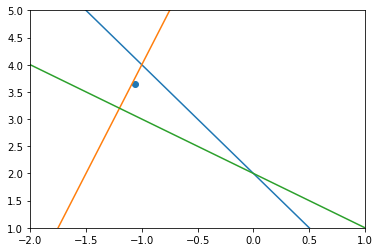

In [16]:
plt.plot(x1, x2_1)
plt.plot(x1, x2_2)
plt.plot(x1, x2_3)
plt.xlim(-2., 1)
plt.ylim(1, 5)

plt.scatter(res[0], res[1])

plt.show()

Maybe you would have expected the point being at the barycenter of the triangle. This is not the case because the equations are not scaled the same way. 

Intuition
Sean Owen - Pseudoinverse intuition
Numpy
Numpy - linalg.pinv

Numpy random seed

Systems of equations
Using the Moore-Penrose Pseudoinverse to Solve Linear Equations

Overdetermined systems

Least square solution in the triangle center

Symmedian

Least square fit
Least square fitting
https://arxiv.org/pdf/1606.03899.pdf